In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import json
from pathlib import Path

dataset_path = Path("/home/juanpablo/Downloads/AFEW-VA/")

valences = []
arousals = []

for config_path in dataset_path.glob("*/*.json"):
    with config_path.open() as f:
        config = json.load(f)
    frames = list(config["frames"].values())
    arousals.extend([frame["arousal"] for frame in frames])
    valences.extend([frame["valence"] for frame in frames])

len(arousals), len(valences)

(30051, 30051)

<AxesSubplot: ylabel='Count'>

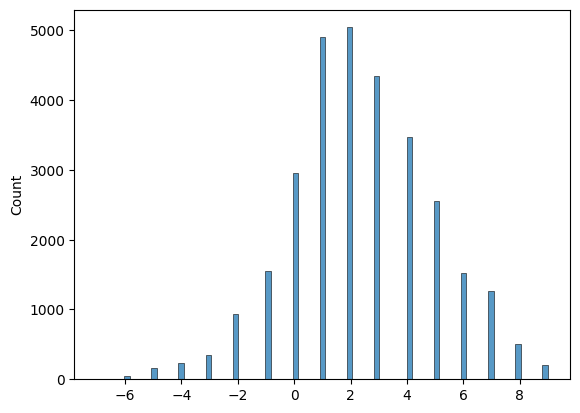

In [14]:
import seaborn as sns

sns.histplot(arousals)

<AxesSubplot: ylabel='Count'>

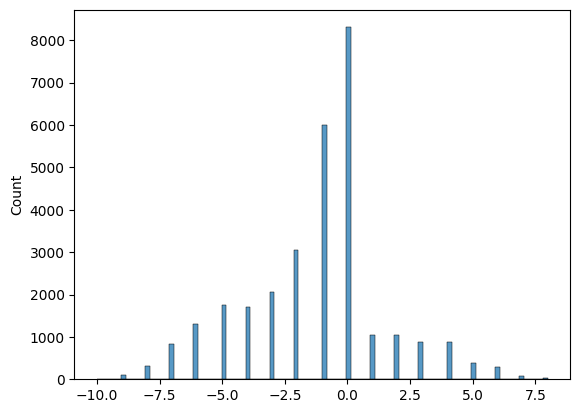

In [15]:
sns.histplot(valences)

In [12]:
import json
from dataset import make_dataset
from transforms import NormalRandomOffsetTransform


split_path = Path("split.json")
with split_path.open() as file:
    split_dict = json.load(file)

train_dataset = make_dataset(root_path=root_path, people_names=split_dict["train"], transforms=NormalRandomOffsetTransform(std=0.05))
val_dataset = make_dataset(root_path=root_path, people_names=split_dict["val"])

len(train_dataset), len(val_dataset)

(1313, 558)

In [13]:
train_counter = defaultdict(int)
for x, y in train_dataset:
    train_counter[y.item()] += 1
dict(sorted(train_counter.items()))

{0.0: 165, 1.0: 190, 2.0: 55, 3.0: 189, 4.0: 94, 5.0: 247, 6.0: 97, 7.0: 276}

In [14]:
val_counter = defaultdict(int)
for x, y in val_dataset:
    val_counter[y.item()] += 1
dict(sorted(val_counter.items()))

{0.0: 74, 1.0: 77, 2.0: 17, 3.0: 68, 4.0: 50, 5.0: 116, 6.0: 51, 7.0: 105}

In [2]:
from src.classifier import Classifier

Classifier.load_from_checkpoint("./pretrained_models/dgcnn.ckpt")

RuntimeError: Error(s) in loading state_dict for Classifier:
	Missing key(s) in state_dict: "model.blocks.0.nn.norms.0.module.weight", "model.blocks.0.nn.norms.0.module.bias", "model.blocks.0.nn.norms.0.module.running_mean", "model.blocks.0.nn.norms.0.module.running_var", "model.blocks.0.nn.norms.1.module.weight", "model.blocks.0.nn.norms.1.module.bias", "model.blocks.0.nn.norms.1.module.running_mean", "model.blocks.0.nn.norms.1.module.running_var", "model.blocks.1.nn.norms.0.module.weight", "model.blocks.1.nn.norms.0.module.bias", "model.blocks.1.nn.norms.0.module.running_mean", "model.blocks.1.nn.norms.0.module.running_var", "model.head_mlp.norms.0.module.weight", "model.head_mlp.norms.0.module.bias", "model.head_mlp.norms.0.module.running_mean", "model.head_mlp.norms.0.module.running_var". 
	Unexpected key(s) in state_dict: "model.blocks.0.nn.norms.0.weight", "model.blocks.0.nn.norms.0.bias", "model.blocks.0.nn.norms.0.running_mean", "model.blocks.0.nn.norms.0.running_var", "model.blocks.0.nn.norms.0.num_batches_tracked", "model.blocks.0.nn.norms.1.weight", "model.blocks.0.nn.norms.1.bias", "model.blocks.0.nn.norms.1.running_mean", "model.blocks.0.nn.norms.1.running_var", "model.blocks.0.nn.norms.1.num_batches_tracked", "model.blocks.1.nn.norms.0.weight", "model.blocks.1.nn.norms.0.bias", "model.blocks.1.nn.norms.0.running_mean", "model.blocks.1.nn.norms.0.running_var", "model.blocks.1.nn.norms.0.num_batches_tracked", "model.head_mlp.norms.0.weight", "model.head_mlp.norms.0.bias", "model.head_mlp.norms.0.running_mean", "model.head_mlp.norms.0.running_var", "model.head_mlp.norms.0.num_batches_tracked". 